# Probability and Statistics

In [1]:
%matplotlib inline
import random
import torch
import matplotlib.pyplot as plt
from torch.distributions.multinomial import Multinomial

## A Simple Example: Tossing Coins

In [2]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [42, 58]


In [3]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([50., 50.])

In [4]:
Multinomial(100, fair_probs).sample() / 100

tensor([0.5600, 0.4400])

In [5]:
counts = Multinomial(10000, fair_probs).sample()
counts / 10000

tensor([0.4923, 0.5077])

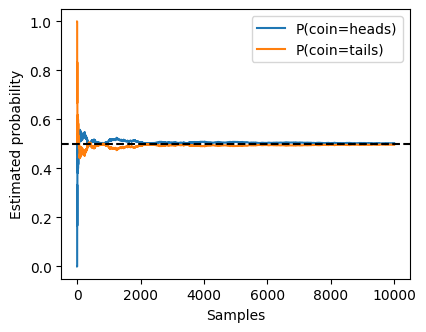

In [6]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

plt.figure(figsize=(4.5, 3.5))
plt.plot(estimates[:, 0], label="P(coin=heads)")
plt.plot(estimates[:, 1], label="P(coin=tails)")
plt.axhline(y=0.5, color='black', linestyle='dashed')
plt.xlabel('Samples')
plt.ylabel('Estimated probability')
plt.legend()